# Setup


In [1]:
import matplotlib.pyplot as plt
def plot_data(data,labels):
  """A helper function to plot our data sets 
  
  PARAMETERS
  ----------
  data      A numpy array of 2 columns (dimensions) and 2*examples_per_class rows
  
  labels    A numpy vector with 2*examples_per_class, with a +1 or -1 in each
            element. The jth element is the label of the jth example"""
  # plot the data
  pos_idx = np.where(labels==1)
  neg_idx = np.where(labels==-1)
  plt.plot(data.T[0,pos_idx], data.T[1,pos_idx],'r^', data.T[0,neg_idx], data.T[1,neg_idx], 'bo')
  plt.axis('equal')

**Run this to visualize your spiral data**

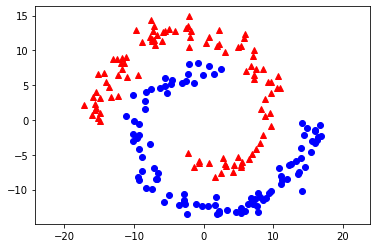

In [2]:
import numpy as np
from numpy import pi
def  make_spiral_data(examples_per_class):
  """create a 2-dimensional set of points in two interwoven spirals. All elements
  in a single spiral share a label (either +1 or -1, depending on the spiral)
  
  PARAMETERS
  ----------
  examples_per_class      An integer determining how much data we'll generate

  RETURNS
  -------
  data      A numpy array of 2 columns (dimensions) and 2*examples_per_class rows
  
  labels    A numpy vector with 2*examples_per_class, with a +1 or -1 in each
            element. The jth element is the label of the jth example"""

 
  theta = np.sqrt(np.random.rand(examples_per_class))*2*pi 

  # make points in a spiral that have some randomness
  r_a = 2*theta + pi
  temp = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
  negData = temp + np.random.randn(examples_per_class,2)

  # make points in a spiral offset from the first one that have some randomness
  r_b = -2*theta - pi
  temp = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
  posData = temp + np.random.randn(examples_per_class,2)

  # give labels to the data
  negL = np.ones(examples_per_class) * -1  
  posL = np.ones(examples_per_class)

  # return the data 
  data = np.concatenate([posData, negData])
  labels = np.concatenate([posL,negL])

  return data, labels

# Test it out
data, labels = make_spiral_data(100)
plot_data(data, labels)


In [3]:
def plot_decision_surface(use_model,model=None, perceptron_weights=0, epochs=0, train_accuracy=0, valid_accuracy=0,  axis_limits=[-5,5,-5,5]):
  """ Creates a grid of points, measures what a model would label each 
   point as, and uses this data to draw a region for class +1 and a region for
   class -1. Note...you could borrow this...
 
  PARAMETERS
  ----------
  use_model   If TRUE, a pytorch model is expected. If FALSE, weights are expected.

  model       A pytorch model that can take 2-d real vaued input and produce
              a +1 or -1 label for each data point. 

  weights     A vector of weights for separating hyperplane used in 
              perceptron_predict(). Note, we're expecting 3 weights here.

  axis_limits an array-like object with 4 floats [lowest_horizontal, highest_horizontal,
              lowest_vertical, highest_vertical]. This sets the limits over which
              the decision surface will be caluclated. 

  RETURNS
  -------
  my_contour  a matplotlib.contour.QuadContourSet with the contour
  """
  # Create a grid of points spanning the entire space displayed in the axis.
  # This will let us draw the decision boundary later

  xx, yy = np.meshgrid(np.arange(axis_limits[0], axis_limits[1], .05),
                       np.arange(axis_limits[2], axis_limits[3], .05))
  data = np.concatenate([xx.reshape([1,-1]),yy.reshape([1,-1])]).T
  
  # Predict the class of each point in XGrid, using the classifier.
  # This shows our regions determined by the classifier
  if use_model == True:
    with torch.no_grad():
      pl = model(torch.tensor(data).to(dtype=torch.float32))
      predicted_labels = np.sign(pl.numpy())
  else:
    predicted_labels = perceptron_predict(data, perceptron_weights)
  
  predicted_labels = predicted_labels.reshape(xx.shape)
  
  # Put the result into a color plot
  plt.contourf(xx, yy, predicted_labels, cmap=plt.cm.Paired)
  if epochs==0:
    before_str = "Before training: "
  else:
    before_str = "After Training: "
  plt.title(before_str + "Epochs=" + str(epochs))
  plt.xlabel("Train accuracy=" + str(train_accuracy)+ " Val accuracy=" + str(valid_accuracy))
  plt.axis('equal')
  plt.axis('tight')


In [4]:
def train_model(model, data, target):
  """ A simple functon that runs the network model through one epoch of the 
  training data and then updates the weights to move moodel output closer to the
  target output. 
  
  PARAMETERS
  ----------
  model   a torch.nn.Model
  data      a 2-D torch tensor where data[i] contains the ith example.
  target    a torch tensor where target[i]  contains the expected output
            of the model in response to input data[i]
  """
  # This tells your model that you are in training mode. 
  # Layers (like dropout, batchnorm) that behave differently
  # when training than they do in testing can behave accordingly.   
  # It doesn't do much on this model, but you need to do this, as standard
  # practice
  model.train()

  # Set the gradients to 0 before running the net on the data
  # so that loss is calculated correctly.
  optimizer.zero_grad()

  # Get the output of the network on the data 
  output = model(data)

  # Measure the "loss" using mean squared error
  loss = F.mse_loss(output.squeeze(), target)
    
  # This calculates the gradients, running backward through the network
  loss.backward()

  # This updates the network weights 
  optimizer.step()


In [5]:
def test_model(model, data, target):
  """ A simple functon that prints out the model's loss and accuracy on the 
  data  
  
  PARAMETERS
  ----------
  model     a torch.nn.Model
  data      a 2-D torch tensor where data[i] contains the ith example.
  target    a torch tensor where target[i]  contains the expected output
            of the model in response to input data[i]
  """
  # This puts the network in evaluation mode so things like dropout aren't done
  model.eval()

  # torch.nograd() tells the system to stop keeping track of gradients (derivatives)
  # when performing calculation. This makes things run faster. 
  with torch.no_grad():
    # get the output of the network on a batch of test examples
    output = model(data)
    output = output.squeeze()
    # measure loss 
    loss = F.mse_loss(output, target)
      
    # get the prediction of the network
    prediction = torch.sign(output)

    # measure the accuracy 
    c = prediction*target
    accuracy = torch.mean((c+1)/2)

    # lets report 
    #print('\nTest set: loss = ', round(loss.item(),4),
          #' accuracy = ', round(accuracy.item(),3), '\n')
    return round(accuracy.item(),3), round(loss.item(),4)
 

In [6]:
import torch

# Make the data  
examples_per_class = 400
distance_between_means = 0
valid_examples = 100

# Create training data and validation data
data, label = make_spiral_data(examples_per_class)
vData, vLabel = make_spiral_data(valid_examples)

# Convert training data and validation data to PyTorch tensors (necessary for training)
dataT = torch.tensor(data).to(dtype=torch.float32)
labelT = torch.tensor(label).to(dtype=torch.float32)
dataV = torch.tensor(vData).to(dtype=torch.float32)
labelV = torch.tensor(vLabel).to(dtype=torch.float32)
 

# Build and train your spiral classifier


**Build a network**

In [42]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
  """

  Neural Network for spiral data. Your network code goes here

  """
  # this bit determines the architecture of each layer...but not how data flows
  def __init__(self):
    super(Net, self).__init__() # has to be here
    self.fc1 = nn.Linear(2, 12)
    self.fc2 = nn.Linear(12, 8)
    self.fc3 = nn.Linear(8, 6)
    self.fc4 = nn.Linear(6, 1)
    
  def forward(self, inputs):
    #inputs = inputs.view(inputs.shape[0], -1)
    inputs = F.relu(self.fc1(inputs))
    inputs = F.relu(self.fc2(inputs))
    inputs = F.relu(self.fc3(inputs))
    inputs = F.tanh(self.fc4(inputs))


    return inputs

**Code to initialize parameters and train model**

/home/m73/miniconda3/envs/ml349/lib/python3.8/site-packages/torch/nn/functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/m73/miniconda3/envs/ml349/lib/python3.8/site-packages/torch/nn/functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


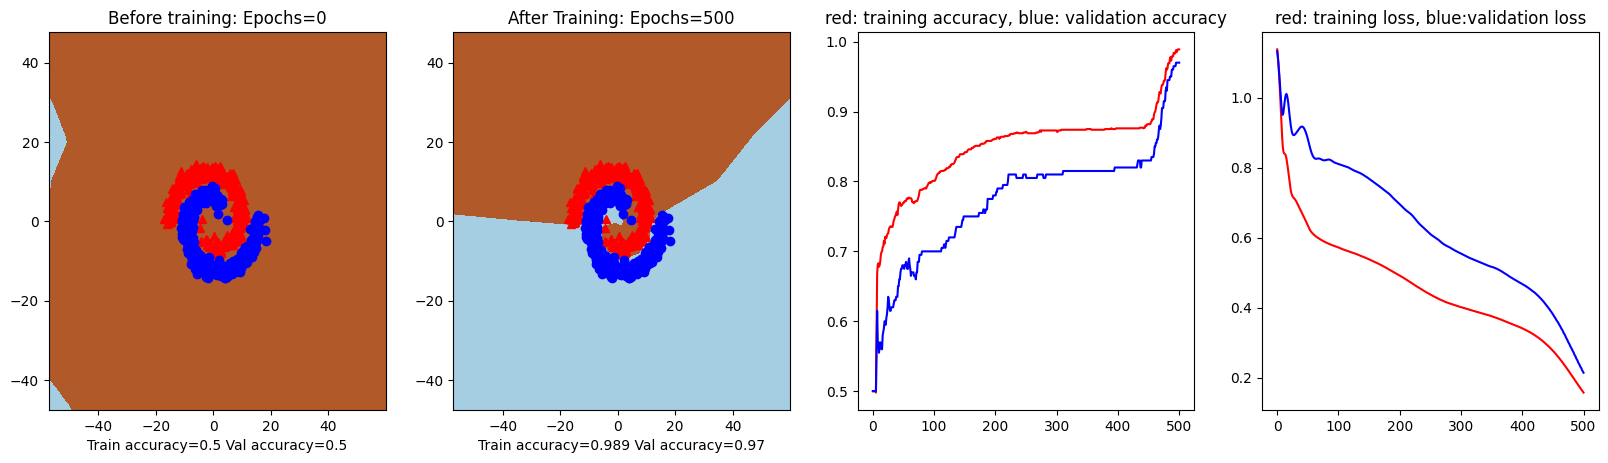

In [45]:
# Initialize Parameters
modelo = Net()
optimizer = optim.SGD(modelo.parameters(), lr=0.01,momentum=0.9)

#Train Model

# Change this parameter
scale = 3

# Plot Results
fig = plt.figure(figsize=(20,5),dpi=100, facecolor='w',edgecolor='k')
ax1= plt.subplot(1,4,1)
ax1=plot_data(dataT,labelT)
xmin,xmax,ymin,ymax=plt.axis()
accuracy,_loss=test_model(modelo, dataT, labelT)
valid, _loss = test_model(modelo, dataV, labelV)
ax1= plot_decision_surface(use_model=True, model=modelo, axis_limits=[xmin*scale,xmax*scale,ymin*scale,ymax*scale],epochs=0,train_accuracy=accuracy, valid_accuracy= valid)


# measure model accuracy

epochs = 500

valid_loss =[0] * 500
train_loss = [0] * 500
valid_acc =[0] * 500
train_acc = [0] * 500

for i in range(0,epochs):
  train_model(modelo,dataT,labelT)
  train_acc[i], train_loss[i] = test_model(modelo,dataT,labelT)
  valid_acc[i], valid_loss[i] = test_model(modelo,dataV,labelV)


ax2= plt.subplot(1,4,2)
ax2= plot_data(dataT,labelT)
accuracy, _loss = test_model(modelo,dataT,labelT)
valid, _loss= test_model(modelo,dataV,labelV)
ax2= plot_decision_surface(use_model=True, model=modelo, axis_limits=[xmin*scale,xmax*scale,ymin*scale,ymax*scale], epochs=epochs, valid_accuracy=valid, train_accuracy=accuracy)


ax3= plt.subplot(1,4,3)
ax3 = plt.plot(np.linspace(0,500,num=500), train_acc, 'r', np.linspace(0,500,num=500), valid_acc, 'b')
ax3= plt.title('red: training accuracy, blue: validation accuracy')

ax4= plt.subplot(1,4,4)
ax3 = plt.plot(np.linspace(0,500,num=500), train_loss, 'r', np.linspace(0,500,num=500), valid_loss, 'b' )
ax3= plt.title('red: training loss, blue:validation loss')

